In [ ]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FuncFormatter
import numpy as np

# Specify the path to your .pkl file
file_path = 'smac2_training_results.pkl'

# Load the data from the .pkl file
with open(file_path, 'rb') as file:
    loaded_data = pickle.load(file)



In [ ]:
experiment_names = ["protoss_5_vs_5", "zerg_5_vs_5", "terran_5_vs_5", "protoss_10_vs_10", "zerg_10_vs_10", "terran_10_vs_10", "protoss_20_vs_20", "zerg_20_vs_20",
                    "terran_20_vs_20", "protoss_10_vs_11", "zerg_10_vs_11", "terran_10_vs_11", "protoss_20_vs_23", "zerg_20_vs_23", "terran_20_vs_23"]

In [ ]:
# Now, 'loaded_data' contains the data from the .pkl file
QMIX_data = {}
for key,value in loaded_data.items():
    for k2, v2 in value.items():
        if k2 == "QMIX":
            QMIX_data[key] = {k2: v2}




# Plotting results for an arbitrary number of steps

In [ ]:
import tensorboard as tb
from tensorboard.backend.event_processing import event_accumulator
import traceback

[5, 12, 13, 17, 21, 23, 24, 29, 36, 38, 40, 45, 52, 54, 60, 62, 64, 66, 72, 77, 85, 88, 92, 96, 100, 104, 110, 113, 117, 124, 126, 129, 132, 135, 139, 147, 151, 155, 159, 163, 167, 172, 176, 178, 182, 187, 190, 194, 199, 201, 210, 214, 217, 220, 225, 230, 234, 240, 241, 243, 247, 254, 258, 260, 262, 275, 278, 280, 283, 287, 290, 293, 297, 301, 304, 308, 313, 316, 320, 322, 324, 326, 331, 333, 334, 338, 343, 345, 350, 354, 356, 359, 362, 365, 367, 374, 379, 386, 390, 393, 396, 399, 404, 406, 411, 414, 417, 419, 422, 429, 434, 438, 441, 445, 452, 454, 456, 461, 466, 469, 473, 478, 483, 486, 490, 495, 499, 505, 510, 514, 518, 521, 526, 537, 541, 544, 547, 549, 552, 560, 565, 568, 569, 571, 583, 587, 590, 595, 598, 603, 605, 609, 615, 620, 630, 634, 636, 637, 640, 648, 650, 654, 658, 662, 665, 675, 676, 679, 682, 686, 689, 692, 694, 697, 701, 703, 705, 707, 709, 713, 718, 724, 728, 729, 734, 738, 744, 748, 751, 753, 757, 764, 770, 772, 775, 776, 784, 791, 795, 799, 803, 810, 811, 817, 820,

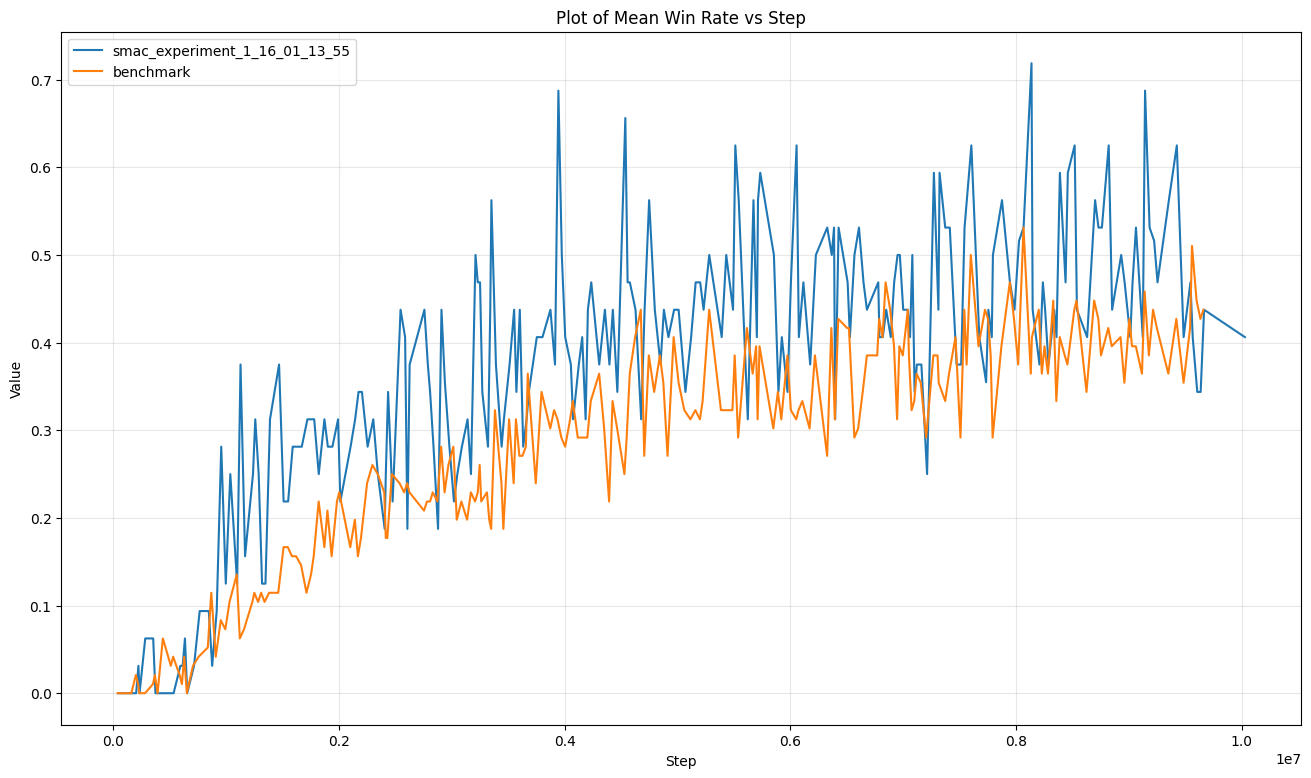

In [64]:
experiment_name = "protoss_10_vs_11"
to_plot = "mean_test_win_rate" # mean_test_win_rate mean_test_return
# df_benchmark = pd.DataFrame(QMIX_data[experiment_name]["QMIX"][2])

def get_tb_results(experiment_name, get):
    logdir = f"./results/{experiment_name}/tb_logs/"
    event_acc = event_accumulator.EventAccumulator(logdir)
    event_acc.Reload()

    tags = event_acc.Tags()['scalars']
    # get = "test_avg_win_rate"
    win_rate_tag = next(s for s in tags if get in s)


    # # Create an empty DataFrame to store the data
    tag_values = [(event.step, event.value) for event in event_acc.Scalars(win_rate_tag)]
    df = pd.DataFrame(tag_values, columns=['Step', "Value"])
    return df

def get_means_from_benchmark_result(experiment_name):
    dfs = []
    for df in range(3):
        df_benchmark = pd.DataFrame(QMIX_data[experiment_name]["QMIX"][df])
        dfs.append(df_benchmark)
    
    mean_df = sum(dfs)/3
    # Get standard deviation:
    std_df = pd.concat(dfs).std()

    
    return mean_df, std_df

df_benchmark_mean, df_benchmark_std = get_means_from_benchmark_result(experiment_name)
# print(df_benchmark_std)

# Load CSV file into a Pandas DataFrame
# experiments_to_plot = ["smac_experiment_1_14_01_11_56", "smac_experiment_1_15_01_07_37"]
experiments_to_plot = ["smac_experiment_1_16_01_13_55"] #smac_experiment_1_16_01_13_55
metric_to_plot = "test_avg_win_rate" #test_avg_win_rate test_mean_reward

# df_noisynet = get_tb_results("smac_experiment_1_14_01_11_56")
# df_ep_greedy = get_tb_results("smac_experiment_1_15_01_07_37")

# Set the predetermined number
predetermined_number = 10050000


# Assuming your CSV has headers, you can reference columns by their names
x_column = 'Step'  # Replace with the actual name of the second column
y_column = 'Value'   # Replace with the actual name of the third column



  # Replace with your predetermined number

# Find the maximum step value less than the predetermined number
max_step_less_than_predetermined = df_benchmark_mean[df_benchmark_mean['step'] < predetermined_number]['step'].max()

# max_step_less_than_predetermined = df_noisynet[df_noisynet['Step'] < predetermined_number]['Step'].max()
# max_step_less_than_predetermined = df_ep_greedy[df_ep_greedy['Step'] < predetermined_number]['Step'].max()


# Filter the DataFrame based on the condition (step less than max_step_less_than_predetermined)


plt.figure(figsize=(16,9))
max_steps = []
dfs = []
try:
    for exp in experiments_to_plot:
        df = get_tb_results(exp, metric_to_plot)
        max_step = df[df['Step'] < predetermined_number]['Step'].max()
        max_steps.append(max_step)
        dfs.append(df)
except Exception as e:
    traceback.print_exc()

for df, exp in zip(dfs, experiments_to_plot):
    filtered_df = df[df['Step'] <= min(max_steps)]
    closest_indices = np.searchsorted(filtered_df['Step'], df_benchmark_mean['step'], side="left")
    sub_from = closest_indices[-1]
    new_indicies = [x - 1 if x == sub_from else x for x in closest_indices]
    print(new_indicies)
    # print(filtered_df)
    filtered_df = filtered_df.iloc[new_indicies]
    plt.plot(filtered_df[x_column], filtered_df[y_column], label = exp)

filtered_df_benchmark = df_benchmark_mean[df_benchmark_mean['step'] <= min(max_steps)]

plt.plot(filtered_df_benchmark['step'], filtered_df_benchmark[to_plot], label = "benchmark")

# plt.fill_between(filtered_df_benchmark['step'], filtered_df_benchmark[to_plot] - df_benchmark_std[:ns], filtered_df_benchmark[to_plot] + df_benchmark_std[:ns], alpha=0.2, label='Standard Deviation')


# filtered_df_noisynet = df_noisynet[df_noisynet['Step'] <= max_step_less_than_predetermined]
# filtered_df_ep_greedy = df_ep_greedy[df_ep_greedy['Step'] <= max_step_less_than_predetermined]

# Filter my data to only plot points that are very close in x-value to the benchmark
# closest_indices = np.searchsorted(filtered_df_noisynet['Step'], filtered_df_benchmark['step'], side="left")
# closest_indices = np.searchsorted(filtered_df_ep_greedy['Step'], filtered_df_benchmark['step'], side="left")


# filtered_df_noisynet = filtered_df_noisynet.iloc[closest_indices]
# filtered_df_ep_greedy = filtered_df_ep_greedy.iloc[closest_indices]




# filtered_df
# Plot the data

# plt.plot(filtered_df_benchmark['step'], filtered_df_benchmark[to_plot], label = "benchmark")
# plt.plot(filtered_df_noisynet[x_column], filtered_df_noisynet[y_column], label = "noisynet")
# plt.plot(filtered_df_ep_greedy[x_column], filtered_df_ep_greedy[y_column], label = "epsilon_greedy")

plt.legend()
plt.title(f"{experiment_name}: {to_plot}")
plt.grid(alpha = 0.3)

# Plot my results
# # Create a scatter plot


# Add labels and title
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title('Plot of Mean Win Rate vs {}'.format(x_column))



plt.show()


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# filtered_df

# Plotting all results for QMIX seed 0

In [ ]:
# types = ["mean_test_return", "mean_test_win_rate"]
# for name in experiment_names:
#     df = pd.DataFrame(QMIX_data[name]["QMIX"][0])
    
#     for type in types:
#         # Assuming df is your DataFrame
#         # Replace 'col1' and 'col2' with your actual column names
#         plt.figure(figsize=(16,9))

#         # Plotting
#         plt.plot(df['step'], df[type], label = type)

#         # Adding labels and title
#         plt.xlabel('Step')
#         plt.ylabel(type)
#         plt.title(f"{name}: {type}")
#         plt.grid(alpha = 0.3)
#         plt.legend()

#         ax = plt.gca()
#         ax.xaxis.set_major_locator(MultipleLocator(1000000))
#         ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x/1000000)))

#         # Display the plot
#         plt.savefig(f"figures/{name}.pdf")


# Plotting mean of benchmark results

ValueError: 'y1' is not 1-dimensional

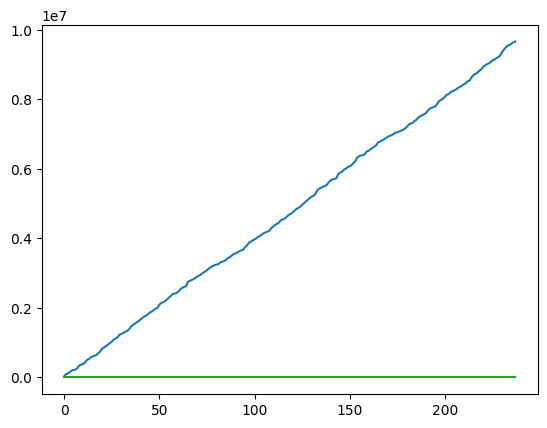

In [56]:
# experiment_name = "protoss_10_vs_11"
# to_plot = "mean_test_win_rate" # mean_test_win_rate mean_test_return
# # df_benchmark = pd.DataFrame(QMIX_data[experiment_name]["QMIX"][2])


def get_means_from_benchmark_result(experiment_name):
    dfs = []
    for df in range(3):
        df_benchmark = pd.DataFrame(QMIX_data[experiment_name]["QMIX"][df])
        dfs.append(df_benchmark)
    
    mean_df = sum(dfs)/3
    # Get standard deviation:
    std_df = pd.concat(dfs).std()

    
    return mean_df, std_df

mean_df,std_df = get_means_from_benchmark_result(experiment_name)
x = mean_df.index 
plt.plot(x, mean_df, label='Mean')
plt.fill_between(x, mean_df - std_df, mean_df + std_df, alpha=0.2, label='Standard Deviation')


# Plotting my own results

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



In [62]:
df_benchmark = pd.DataFrame(QMIX_data[experiment_name]["QMIX"][2])
df_benchmark

,step,mean_test_win_rate,mean_test_return
0,91109,0.00000,9.690502
1,171876,0.00000,9.876113
2,202084,0.00000,9.398527
3,222399,0.00000,9.440770
4,323504,0.03125,9.623656
5,343548,0.00000,9.026542
6,353700,0.00000,10.369472
7,363817,0.00000,9.811464
8,444821,0.00000,9.154813
9,464906,0.06250,10.861093
